In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline


In [14]:
train = pd.read_csv("train.csv") #Reading the dataset in a dataframe using Pandas
test = pd.read_csv("test.csv")

In [15]:
test['Loan_Status'] = np.nan

In [16]:
#joining bot train and test for data preparation
alldata=pd.concat([train, test]).reset_index(drop=True)

In [17]:
alldata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [18]:
x=alldata.apply(lambda x: sum(x.isnull()),axis=0)
print(x)

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64


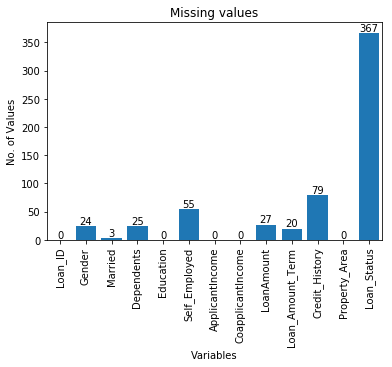

In [20]:
ind = np.arange(13)
ax=x.plot(kind='bar',grid='false')
ax.set_xlabel('Variables')
ax.set_title('Missing values')
ax.set_ylabel('No. of Values')
x = ax.bar(ind, x.values)
for rect in x:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),ha='center', va='bottom')

Text(0,0.5,'Loan Amount')

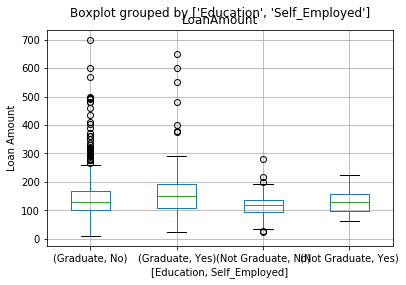

In [26]:

### From my sense Loan Amount is dependent on Employment and education
### supervised learning model to predict loan amount on the basis of other variables

ax = alldata.boxplot(column='LoanAmount', by=['Education','Self_Employed'])
ax.set_ylabel('Loan Amount')

In [25]:

# 55 Self_employed value is missing so first imputing it with Mode and Median
alldata['Self_Employed'].fillna(alldata['Self_Employed'].mode().iloc[0],inplace=True)

alldata['Gender'].fillna(alldata['Gender'].mode().iloc[0],inplace=True)

alldata['Credit_History'].fillna(alldata['Credit_History'].median(),inplace=True)

In [28]:

# pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education features
table = alldata.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
print(table)

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         117.0
Yes               150.0         130.0


In [30]:

# Replace missing values of Loan Amount
alldata['LoanAmount'].fillna(alldata[alldata['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [32]:

# Total Income matters for Loan amount and loan amount term
alldata['TotalIncome'] = alldata['ApplicantIncome'] + alldata['CoapplicantIncome']

In [31]:
#we can see almost all missing values are imputed
alldata.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID                0
Gender                 0
Married                3
Dependents            25
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term      20
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [36]:
alldata.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,5540.0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,5532.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0


### converting all our categorical variables into numeric by encoding the categories
cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in cols:
    alldata[i] = le.fit_transform(alldata[i])
alldata.dtypes

### split the merged data file into train and test respectively
train_set = alldata[~pd.isnull(alldata.Is_Response)]
test_set = alldata[pd.isnull(alldata.Is_Response)]

### set target variable
train_set['Is_Response'] = [1 if x == 'Y' else 0 for x in train_set['Is_Response']]